# 

title: Water Rights Restored to the Gila River

subtitle: The impacts of irrigation on vegetation health in the Gila
River Valley

author:

-   Elsa Culler

-   Nate Quarderer

date: last-modified

image: /img/earth-analytics/water-rights/lesson-water-rights.png

image-alt: “Dry river with dead plants turns into a stream with living
plants”

description: \|

In 2004, the Akimel O’‘otham and Tohono O’’odham tribes won a water
rights settlement in the US Supreme Court. Using satellite imagery, we
can see the effects of irrigation water on the local vegetation.

learning-goals:

-   Open raster or image data using code

-   Combine raster data and vector data to crop images to an area of
    interest

-   Summarize raster values with stastics

-   Analyze a time-series of raster images

params:

id: stars

site_name: Gila River Indian Community

event: water rights case

data_dir: gila-river

jupyter:

kernelspec:

    name: learning-portal

    language: python

    display_name: Learning Portal

# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
%store -r ndvi_das ndvi_xr boundary_gdf

You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [2]:
# Import libraries

import hvplot.xarray
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import rioxarray

# STEP 3: Plot NDVI

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot the change in NDVI spatially</div></div><div class="callout-body-container callout-body"><p>Complete the following:</p>
<ul>
<li>Select data from 2021 to 2023 (3 years after the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="1"></span>)</li>
<li>Take the temporal mean (over the <strong>date</strong>, not
spatially)</li>
<li>Get the NDVI variable (should be a DataArray, not a Dataset)</li>
<li>Repeat for the data from 2018 to 2020 (3 years before the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="2"></span>)</li>
<li>Subtract the 2018-2020 time period <strong>from</strong> the
2021-2023 time period</li>
<li>Plot the result using a <strong>diverging</strong> color map like
<code>cmap=plt.cm.PiYG</code></li>
</ul>
<p>There are different types of color maps for different types of data.
In this case, we want decreases to be a different color from increases,
so we should use a <strong>diverging</strong> color map. Check out
available colormaps in the <a
href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">matplotlib
documentation</a>.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?</div></div><div class="callout-body-container callout-body"><p>For an extra challenge, add the <span data-__quarto_custom="true"
data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="3"></span> boundary to the plot.</p></div></div>

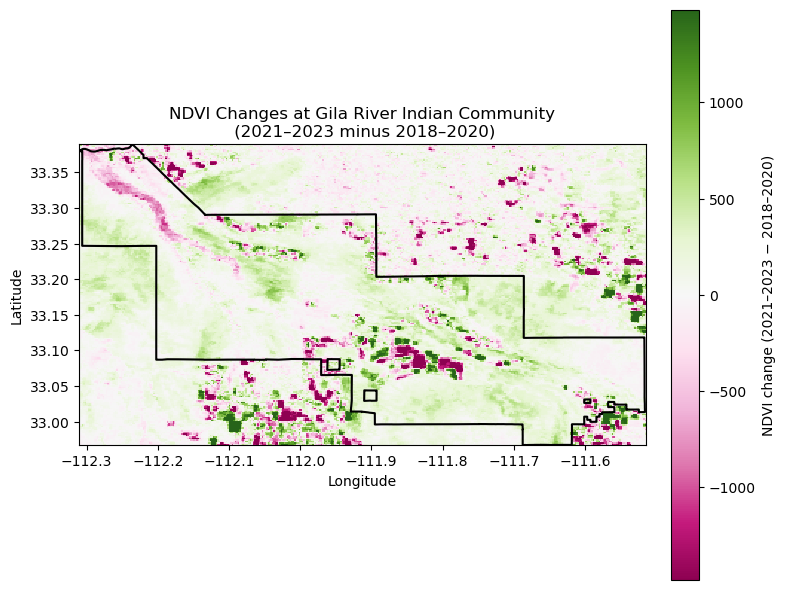

In [3]:
# Plot NDVI change (2021–2023 minus 2018–2020) with boundary overlay

# 1) Ensure DataArray; 2) temporal means; 3) difference
ndvi_da   = ndvi_xr["NDVI"] if hasattr(ndvi_xr, "data_vars") and "NDVI" in ndvi_xr.data_vars else ndvi_xr
ndvi_post = ndvi_da.sel(date=slice("2021","2023")).mean(dim="date", skipna=True)
ndvi_pre  = ndvi_da.sel(date=slice("2018","2020")).mean(dim="date", skipna=True)
ndvi_diff = (ndvi_post - ndvi_pre).squeeze(drop=True)

# 4) Reproject to WGS84 (copy CRS/transform if math dropped them)
import rioxarray
if getattr(ndvi_diff.rio, "crs", None) is None:
    ref = ndvi_da.isel(date=0)
    ndvi_diff = ndvi_diff.rio.write_crs(ref.rio.crs).rio.write_transform(ref.rio.transform())
ndvi_diff_4326 = ndvi_diff.rio.reproject("EPSG:4326")

# 5) Plot with diverging colormap (PiYG) + EXTRA: boundary overlay
vals  = ndvi_diff_4326.values
finite = vals[np.isfinite(vals)]
vmax  = float(np.nanpercentile(np.abs(finite), 98)) if finite.size else 0.3
vmin  = -vmax
xmin, ymin, xmax, ymax = ndvi_diff_4326.rio.bounds()

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(vals, cmap=plt.cm.PiYG, vmin=vmin, vmax=vmax,
               extent=(xmin, xmax, ymin, ymax), origin="upper", interpolation="nearest")
boundary_gdf.to_crs(4326).plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1.5)
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04); cbar.set_label("NDVI change (2021–2023 − 2018–2020)")
ax.set_aspect("equal", adjustable="box")
ax.set_title("NDVI Changes at Gila River Indian Community\n (2021–2023 minus 2018–2020)")
ax.set_xlabel("Longitude"); ax.set_ylabel("Latitude")
plt.show()


# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [4]:
%store ndvi_diff_4326

Stored 'ndvi_diff_4326' (DataArray)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!